# Introduction

This notebook shows how python with the aid of jupyter notebook can be used to perform particle size analysis. An example dataset from a sieving analysis is going to be used for this purpose. The data contains a set of given mesh sizes in μm and the mass of particles retained in each sieve in g. With this data, the particle distribution is going to be calculated and plotted with the following plots:- Histograms, cumulative distribution curve (undersize) and frequency distribution curve. The nice thing about jupyter notebook is that it allows for easy automation of the calculation process and can handle huge data fast and easy. However, certain things have to be kept in mind regarding the use of the notebook. More of this is explained in the markdown file:- "README.md" accompanying the folder where this file is located in. Follow this [link](https://github.com/sethsomtoo/Particle-size-analysis-with-python) for easy access to the whole file. Also contained in this folder is some literature created with "jupyter notebook markdown" to explain some things relating to particle size data presentation and interpretation. To proceed with the analysis, first the necessary built in python libraries (numpy, pandas and matplotlib) will have to be imported as the initial setup for the notebook. Numpy and pandas are built in python libraries that offer the necessary tools and functions to facilitate computation and data processing. Matplotlib is also a built in python library to facilitate the creation of plots and visualization of data with the aid of plots.

# Importing the libraries and initial setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

After running the above codes, the data can then be created as follows:

# Creating the DataFrame

In [7]:
data = {"Mesh size (μm)" : [0, 45, 63, 90, 125, 180, 250, 355, 500, 710, 1000, 1400, 1800],
       "Mass retained (g)" : [1.1, 1.9, 5.25, 7.5, 21.8, 37.5, 37.5, 97, 90, 112.5, 285, 52.5, np.nan]}

df = pd.DataFrame(data)
df

,Mesh size (μm),Mass retained (g)
0,0,1.10
1,45,1.90
2,63,5.25
3,90,7.50
4,125,21.80
5,180,37.50
6,250,37.50
7,355,97.00
8,500,90.00
9,710,112.50


In this case as presented above, the data was created directly in this notebook. However, it could be possible to also import data on particle sizes from other sources such as excel into jupyter notebook and the pandas library is very good with this. More on how to do this can be found in this [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to pandas documentation. 

# Histogram

To plot the histogram, the data shall be divided into the class sizes by calculating the width between intervals. Also the mass fractions and the quantity function (qr) will also be calculated and added to the data frame. The quantity (qr) is calculated as follows:  
\begin{equation*}
 q_{r} = \frac{\bar{X}}{\Delta X}
\end{equation*}

Where $\bar{X}$ is the mass fraction, and $\Delta X$ is the width i.e the size interval. 

## Calculate the quantitiy distribution fucntion, $q_{r}$ for the histogram

In [3]:
# Define the function for mass fractions
def mass_fraction(mass):
    '''This function requires the column of mass retained from the data frame to be parsed in.
    It will then compute the mass fractions.
    '''
    mass_frac = (mass / mass.sum()).round(3)
    return mass_frac

In [4]:
# Define the function for the width i.e size of intervals
def class_width(mesh):
    ''' The column of mesh sizes from the data can be parsed into this function as the arguement.
    The function then uses the mesh sizes to compute the width.
    '''
    widths = mesh.diff()
    return widths

In [19]:
# Compute the mass fractions and the class widths by calling the respective functions
df2 = df.copy()
df2['Mass fraction'] = mass_fraction(df2['Mass retained (g)'])
df2['Class_width (μm)'] = class_width(df2['Mesh size (μm)']).shift(-1)

# Compute the quantity distribution function for the histogram
df2['$q_{r}$'] = df2['Mass fraction'] / df2['Class_width (μm)']
df2

,Mesh size (μm),Mass retained (g),Mass fraction,Class_width (μm),$q_{r}$
0,0,1.10,0.001,45.0,0.000022
1,45,1.90,0.003,18.0,0.000167
2,63,5.25,0.007,27.0,0.000259
3,90,7.50,0.010,35.0,0.000286
4,125,21.80,0.029,55.0,0.000527
5,180,37.50,0.050,70.0,0.000714
6,250,37.50,0.050,105.0,0.000476
7,355,97.00,0.129,145.0,0.000890
8,500,90.00,0.120,210.0,0.000571
9,710,112.50,0.150,290.0,0.000517


## Create the Histogram plot 

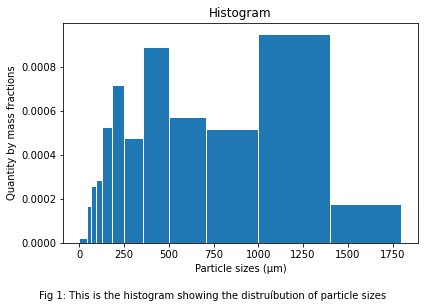

In [24]:
fig, ax = plt.subplots()
plt.bar(df2['Mesh size (μm)'], df2['$q_{r}$'], width=df2['Class_width (μm)'], align='edge', edgecolor='white' )
plt.tight_layout()

ax.set_xlabel('Particle sizes (μm)')
ax.set_ylabel('Quantity by mass fractions')
ax.set_title('Histogram')
plt.figtext(0.5,-0.05, s = "Fig 1: This is the histogram showing the distruíbution of particle sizes", wrap=True, horizontalalignment='center')

plt.tight_layout()

## Alternative plot of the Histogram in Semi-log scale 

In the plot above, the height of the bars represents the amount of particles in a specific size class while the width of the bar shows the size of the class width. Also it can also be seen from the plot that there is a geometric progression increase in the particle size class and this is normal in particle size analysis. However, to get an even constant bar width, which is helpful in simplifying the interpretation of the histogram, the x_axis can be set to a log scale to obtain the figure in fig 2 shown below. 

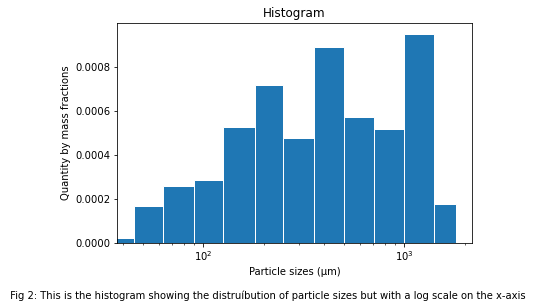

In [29]:
#plotting the histogram using semilog
fig, ax = plt.subplots()
plt.bar(df2['Mesh size (μm)'], df2['$q_{r}$'], width=df2['Class_width (μm)'], align='edge', edgecolor='white')

ax.set_xlabel('Particle sizes (μm)')
ax.set_ylabel('Quantity by mass fractions')
ax.set_title('Histogram')
plt.figtext(0.5,-0.05, s = " Fig 2: This is the histogram showing the distruíbution of particle sizes but with a log scale on the x-axis", 
            wrap=True, horizontalalignment='center')

plt.tight_layout()

ax.set_xscale('log')

# Cumulative distribution